##Las mejores  ciudades para vivir
La información con  cuál se realizará el siguiente analisis descriptivo  es parte de un estudio que hizo Arcadis en colaboración de el Centre for economics and Business Research, en donde buscaban hacer un ranking para encontrar cuales son las mejores ciudades para vivir y que cuiden los siguientes 3 aspectos:

- Calidad de vidad de las personas
- Relación con el medio ambiente 
- Salud economica de la ciudad

Tomando en cuenta lo anterior Arcadis realizo un ranking del promedio sobre 100 ciudades de diferentes partes del mundo, con ayuda de 32 indicadores que no son representados en nuestra base de datos.
 
 Información adicional proporcionada:
  
 - Pais en donde se encuentra
 - Continente

 Integrantes:
 
 Aura Orozpe

 Ariadna Lozano

In [ ]:
#importamos las diferentes librerias que utilizaremos.
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
#Ulizamos pd.read para poder leer la base de datos con la que  que trabajamos
data= pd.read_csv('GreenCities-Data.csv').head(20)
data.head(100)

,city,People,Planet,Profit,Overall,Country,Continent
0,Zurich,27,1,5,1,Switzerland,Europe
1,Singapore,48,12,1,2,Singapore,Asia
2,Stockholm,14,2,10,3,Sweden,Europe
3,Vienna,4,4,14,4,Austria,Europe
4,London,37,9,3,5,U.K.,Europe
5,Frankfurt,16,5,23,6,Germany,Europe
6,Seoul,1,26,18,7,South Korea,Asia
7,Hamburg,3,10,25,8,Germany,Europe
8,Prague,6,31,7,9,Czechia,Europe
9,Munich,8,24,11,10,Germany,Europe


In [ ]:
#Las dimensiones con las que cuenta nuestra database, como si fuera una matriz
data.shape

(20, 7)

In [ ]:
#Nos muestra la información basica de nuestra base de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city       20 non-null     object
 1   People     20 non-null     int64 
 2   Planet     20 non-null     int64 
 3   Profit     20 non-null     int64 
 4   Overall    20 non-null     int64 
 5   Country    20 non-null     object
 6   Continent  20 non-null     object
dtypes: int64(4), object(3)
memory usage: 1.2+ KB


In [ ]:
#Resumen estadistico-descriptivo de los atributos numericos con los que contamos
data.describe()

,People,Planet,Profit,Overall
count,20.000000,20.000000,20.000000,20.00000
mean,20.300000,15.550000,17.050000,10.50000
std,19.614978,10.070671,13.160847,5.91608
min,1.000000,1.000000,1.000000,1.00000
25%,5.750000,8.000000,6.750000,5.75000
50%,16.500000,14.500000,15.000000,10.50000
75%,27.750000,24.250000,23.500000,15.25000
max,81.000000,32.000000,46.000000,20.00000


In [ ]:
#Vamos agregar un ID por cada uno de los paises, para transformarlo en un dato numerico
#df_ID = pd.DataFrame()
#paises = ["China", "South Korea", "Netherlands", "Germany", "Austria", "Czechia", "Sweden", "Australia", "Spain", "France", "Denmark", "Switzerland", "U.K.", "Singapore"]
#ID = [1,2,3,4,5,6,7,8,9,10,11,12,13,14] 
#df_ID["Country"] = paises 
#df_ID["ID"] = ID
#df_ID

In [ ]:
#PARA LA REGRESIÓN LINEAL POSTERIOR, AGREGAMOS LOS HABITANTES DE CADA PAÍS A NUESTRA INFORMACIÓN
#Creamos dos listas una de países y otra de sus habitantes y lo convertimos en un data frame 
#Este dataframe contiene los mismos valores de country que el data frame original
df_población = pd.DataFrame()
paises = ["China", "South Korea", "Netherlands", "Germany", "Austria", "Czechia", "Sweden", "Australia", "Spain", "France", "Denmark", "Switzerland", "U.K.", "Singapore"]
Población_millones = [1389.000000,512.69183 , 17.440000, 83.783945, 8.978929, 10.708982, 1.054236, 25.499881, 47.435597,65.273512 , 5.873420, 5.792203, 67.081000, 5.454000] 
df_población["Country"] = paises 
df_población["Habitantes"] = Población_millones
df_población

,Country,Habitantes
0,China,1389.000000
1,South Korea,512.691830
2,Netherlands,17.440000
3,Germany,83.783945
4,Austria,8.978929
5,Czechia,10.708982
6,Sweden,1.054236
7,Australia,25.499881
8,Spain,47.435597
9,France,65.273512


In [ ]:
df_población["Habitantes"]/100000


0     0.013890
1     0.005127
2     0.000174
3     0.000838
4     0.000090
5     0.000107
6     0.000011
7     0.000255
8     0.000474
9     0.000653
10    0.000059
11    0.000058
12    0.000671
13    0.000055
Name: Habitantes, dtype: float64

In [ ]:
df_complete=pd.merge(data, df_población, on='Country')
df_complete

,city,People,Planet,Profit,Overall,Country,Continent,Habitantes
0,Zurich,27,1,5,1,Switzerland,Europe,5.792203
1,Geneva,30,3,42,12,Switzerland,Europe,5.792203
2,Singapore,48,12,1,2,Singapore,Asia,5.454000
3,Stockholm,14,2,10,3,Sweden,Europe,1.054236
4,Vienna,4,4,14,4,Austria,Europe,8.978929
5,London,37,9,3,5,U.K.,Europe,67.081000
6,Edinburgh,38,22,6,13,U.K.,Europe,67.081000
7,Frankfurt,16,5,23,6,Germany,Europe,83.783945
8,Hamburg,3,10,25,8,Germany,Europe,83.783945
9,Munich,8,24,11,10,Germany,Europe,83.783945


1. ¿Cuales son los 10 paises con mayor calidad de vida en cada categoría?
¿El número de habitantes tiene relación con estos posicionamientos?

In [ ]:
#Seleccionamos la columnas a trabajar con people
df_people = df_complete[["People","Country","Habitantes"]]
df_people.set_index("People")
df_people1 = df_people.sort_values(by="People", ascending=True)
df_people1.head(10)

,People,Country,Habitantes
11,1,South Korea,512.691830
14,2,Netherlands,17.440000
8,3,Germany,83.783945
4,4,Austria,8.978929
10,5,Germany,83.783945
12,6,Czechia,10.708982
13,7,Netherlands,17.440000
9,8,Germany,83.783945
3,14,Sweden,1.054236
7,16,Germany,83.783945


In [ ]:
df_people2 = df_people.sort_values(by="Habitantes", ascending=True)
df_people2.head(10)

,People,Country,Habitantes
3,14,Sweden,1.054236
2,48,Singapore,5.454000
0,27,Switzerland,5.792203
1,30,Switzerland,5.792203
15,24,Denmark,5.873420
4,4,Austria,8.978929
12,6,Czechia,10.708982
14,2,Netherlands,17.440000
13,7,Netherlands,17.440000
18,17,Australia,25.499881



Sólo el 40% de los países con menos población del ranking se encuentran entre las mejores posiciones de la categoría "people"


In [ ]:
#Seleccionamos la columnas a trabajar con profit
df_profit = df_complete[["Profit","Country","Habitantes"]]
df_profit.set_index("Profit")
df_profit1 = df_profit.sort_values(by="Profit", ascending=True)
df_profit1.head(10)

,Profit,Country,Habitantes
2,1,Singapore,5.454000
17,2,China,1389.000000
5,3,U.K.,67.081000
0,5,Switzerland,5.792203
6,6,U.K.,67.081000
12,7,Czechia,10.708982
16,9,France,65.273512
3,10,Sweden,1.054236
9,11,Germany,83.783945
4,14,Austria,8.978929


In [ ]:
df_profit2 = df_profit.sort_values(by="Habitantes", ascending=True)
df_profit2.head(10)

,Profit,Country,Habitantes
3,10,Sweden,1.054236
2,1,Singapore,5.454000
0,5,Switzerland,5.792203
1,42,Switzerland,5.792203
15,17,Denmark,5.873420
4,14,Austria,8.978929
12,7,Czechia,10.708982
14,46,Netherlands,17.440000
13,16,Netherlands,17.440000
18,20,Australia,25.499881


Sólo el 30% de los países con menos población del ranking se encuentran entre las mejores posiciones de la categoría "profit"

In [ ]:
#Seleccionamos la columnas a trabajar con planet
df_planet = df_complete[["Planet","Country","Habitantes"]]
df_planet.set_index("Planet")
df_planet1 = df_profit.sort_values(by="Profit", ascending=True)
df_planet1.head(10)

,Profit,Country,Habitantes
2,1,Singapore,5.454000
17,2,China,1389.000000
5,3,U.K.,67.081000
0,5,Switzerland,5.792203
6,6,U.K.,67.081000
12,7,Czechia,10.708982
16,9,France,65.273512
3,10,Sweden,1.054236
9,11,Germany,83.783945
4,14,Austria,8.978929


In [ ]:
df_planet1 = df_planet.sort_values(by="Habitantes", ascending=True)
df_planet1.head(10)

,Planet,Country,Habitantes
3,2,Sweden,1.054236
2,12,Singapore,5.454000
0,1,Switzerland,5.792203
1,3,Switzerland,5.792203
15,13,Denmark,5.873420
4,4,Austria,8.978929
12,31,Czechia,10.708982
14,17,Netherlands,17.440000
13,19,Netherlands,17.440000
18,25,Australia,25.499881


Sólo el 40% de los países con menos población del ranking se encuentran entre las mejores posiciones de la categoría "planet"



Resultado: El número de habitantes importa más en las categorías de people y planet, sin embargo en la categoría de profit es donde menos afecta. 
Conclusión= 
1. Podemos comprobar la teoría de Keynes sobre la poca relación entre el número de habitantes y el ingreso total, ya que lo que influye es la tecnología 
2. En la categoría de planet, si influye el número de habitantes (por la contaminación producida) sin embargo otros factores ecológicos de cada país influyen más. 
3. En la categoría de people, si influye el número de habitantes (por la calidad de vida) sin embargo no es el factor más influyente. 

2.¿Qué parametros fueron considerados para determinar la calificación?

Los parametros utilizados para darle esa puntación a cada una de las ciudades es:
- La tasa de salud
-Educación que recibe la población
-Desigualdad de los ingresos
- Conciliación de la vida laboral y personal
- Relación entre asalariados y dependientes.
- Habitantes 

3. Interpreten detalladamente el summary-estadistico descriptivo de los atributos numericos

In [ ]:
#Describe con ayuda a conocer mejor el summary estadístico-descriptivo de los atributos numéricos
df_complete.describe()

,People,Planet,Profit,Overall,Habitantes
count,20.000000,20.000000,20.000000,20.00000,20.000000
mean,20.300000,15.550000,17.050000,10.50000,129.386629
std,19.614978,10.070671,13.160847,5.91608,316.438380
min,1.000000,1.000000,1.000000,1.00000,1.054236
25%,5.750000,8.000000,6.750000,5.75000,8.202552
50%,16.500000,14.500000,15.000000,10.50000,36.467739
75%,27.750000,24.250000,23.500000,15.25000,83.783945
max,81.000000,32.000000,46.000000,20.00000,1389.000000


* Interpretación:
- Count= Expresa que hay 100 registros totales
- Mean = Promedio de rankings no nos sirve, pero el promedio de habitantes sí
- STD = Calcula la desviación standar de los datos, como todos son rankings es la misma, sin embargo en habitantes varía
- Min = indica que el valor mínimo (primer lugar) del ranking es 1 y en habitantes es 1.054236e+06
- 25% = primer cuartil abarca del número 1 al 25 en posición y en habitantes 8.202552e+06
- 50% = Segundo cuartil del 25 al 50 en posición y en habitantes 3.646774e+07
- 75% = Tercer cuartil del 50 al 75 en posición y en habitantes 7.125674e+07
- Max = indica que el valor máximo (último) del ranking es el 100 y en habitantes 1.389000e+09

4. Boxplot del análisis descriptivo de los datos

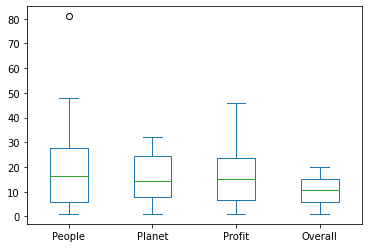

In [ ]:
#Ralización de boxplot para saber la distribución de los datos
data.plot(kind="box")

Boxplot de nuestra información

5. Calcula la media y varianza de los paises con mayor población.¿Cuál es la media poblacional de paises con mayor calidad de vida?

In [ ]:
#Creamos nueva tabla ordenada ascendentemente en base a People 
data1 = data.groupby("People")
data1 = data.sort_values(["People"],ascending=True)
data1

,city,People,Planet,Profit,Overall,Country,Continent
6,Seoul,1,26,18,7,South Korea,Asia
18,Rotterdam,2,17,46,19,Netherlands,Europe
7,Hamburg,3,10,25,8,Germany,Europe
3,Vienna,4,4,14,4,Austria,Europe
16,Berlin,5,16,32,17,Germany,Europe
8,Prague,6,31,7,9,Czechia,Europe
10,Amsterdam,7,19,16,11,Netherlands,Europe
9,Munich,8,24,11,10,Germany,Europe
2,Stockholm,14,2,10,3,Sweden,Europe
5,Frankfurt,16,5,23,6,Germany,Europe


In [ ]:
#Eliminamos los valores (columnas) que no nos sirven y sólo dejamos People y Country(qué sera nuestra columna de unión)
data1 = data1.drop(["Planet", "city", "Profit", "Overall", "Continent"], axis=1)
data1

,People,Country
6,1,South Korea
18,2,Netherlands
7,3,Germany
3,4,Austria
16,5,Germany
8,6,Czechia
10,7,Netherlands
9,8,Germany
2,14,Sweden
5,16,Germany


In [ ]:
#Creamos dos listas una de países y otra de sus habitantes y lo convertimos en un data frame 
#Este dataframe contiene los mismos valores de country que el data frame original
df_población = pd.DataFrame()
paises = ["China", "South Korea", "Netherlands", "Germany", "Austria", "Czechia", "Sweden", "Australia", "Spain", "France", "Denmark", "Switzerland", "U.K.", "Singapore"]
Población_millones = [1389000000,51269183 , 17440000, 83783945, 8978929, 10708982, 1054236, 25499881, 47435597,65273512 , 5873420, 5792203, 67081000, 5454000] 
df_población["Country"] = paises 
df_población["Habitantes"] = Población_millones
df_población

,Country,Habitantes
0,China,1389000000
1,South Korea,51269183
2,Netherlands,17440000
3,Germany,83783945
4,Austria,8978929
5,Czechia,10708982
6,Sweden,1054236
7,Australia,25499881
8,Spain,47435597
9,France,65273512


In [ ]:
#Ordenamos la tabla de mayor a menor 
#Aquí tenemos nuestro TOP 10 países más poblados 
data_order = df_población.sort_values(["Habitantes"],ascending=False)
data_order

,Country,Habitantes
0,China,1389000000
3,Germany,83783945
12,U.K.,67081000
9,France,65273512
1,South Korea,51269183
8,Spain,47435597
7,Australia,25499881
2,Netherlands,17440000
5,Czechia,10708982
4,Austria,8978929


In [ ]:
#Unimos l df anterior con el data frame que habíamos reducido previamente
df_master = pd.merge(data1,data_order,left_on="Country",right_on="Country")
df_master

,People,Country,Habitantes
0,1,South Korea,51269183
1,2,Netherlands,17440000
2,7,Netherlands,17440000
3,3,Germany,83783945
4,5,Germany,83783945
5,8,Germany,83783945
6,16,Germany,83783945
7,4,Austria,8978929
8,6,Czechia,10708982
9,14,Sweden,1054236


In [ ]:
#Ahora sacamos el promedio de los paises en la categoría de people 
Best_Country= df_master.groupby("Country")[["People"]].mean().sort_values(["People"], ascending=True)
Best_Country


,People
Country,
South Korea,1.0
Austria,4.0
Netherlands,4.5
Czechia,6.0
Germany,8.0
Sweden,14.0
Australia,17.0
Spain,18.0
France,20.0


In [ ]:
#Sacamos el promedio de habitantes 
Best_Country2= df_master.groupby("Country")[["Habitantes"]].mean().sort_values(["Habitantes"], ascending=True)
Best_Country2


,Habitantes
Country,
Sweden,1.054236e+06
Singapore,5.454000e+06
Switzerland,5.792203e+06
Denmark,5.873420e+06
Austria,8.978929e+06
Czechia,1.070898e+07
Netherlands,1.744000e+07
Australia,2.549988e+07
Spain,4.743560e+07


In [ ]:
#Como los valores eran muy altos, los dividimos ente un millón 
Best_Country2.Habitantes=Best_Country2.Habitantes/1000000
Best_Country2

,Habitantes
Country,
Sweden,1.054236
Singapore,5.454000
Switzerland,5.792203
Denmark,5.873420
Austria,8.978929
Czechia,10.708982
Netherlands,17.440000
Australia,25.499881
Spain,47.435597


In [ ]:
#Creamos otro df que tenga nuestra columna común (Country) y Overall 
dataoverall = data[["Country" , "Overall"]]

In [ ]:
#Unimos nuestros dos data frames para obtener country, habitantes y overall
df_mastercomplete = pd.merge(Best_Country2,dataoverall,left_on="Country",right_on="Country")
df_mastercomplete.sort_values(by= "Overall", ascending= True).head(10)

,Country,Habitantes,Overall
2,Switzerland,5.792203,1
1,Singapore,5.454000,2
0,Sweden,1.054236,3
5,Austria,8.978929,4
13,U.K.,67.081000,5
15,Germany,83.783945,6
11,South Korea,51.269183,7
16,Germany,83.783945,8
6,Czechia,10.708982,9
17,Germany,83.783945,10


In [ ]:
#Agrupamos para ahora saber cuales son los mejores paises por un promedio de los factores, en su calidad de vida.
Media_Mejores= data.groupby("Country")[["People"]].mean().sort_values(["People"],ascending=True).head(10)
Media_Mejores

,People
Country,
South Korea,1.0
Austria,4.0
Netherlands,4.5
Czechia,6.0
Germany,8.0
Sweden,14.0
Australia,17.0
Spain,18.0
France,20.0


In [ ]:
#Agrupamos para ahora saber la variación

p_var=df_master.groupby("Country")[["People"]].var().sort_values(["People"],ascending=True)
p_var2= p_var.dropna()
p_var2

,People
Country,
U.K.,0.500000
Switzerland,4.500000
Netherlands,12.500000
Germany,32.666667


5a.Calcula la media y la varianza del parametro Salud Social de los mejoresciudades para vivir ¿Cuál es la medida de las peores ciudades?

In [ ]:
#Hacemos una agrupación para conocer cual es la medida de las peores ciudades, ordenamos en descendente porque los últimos números son los peores 
df_master.groupby("Country")[["People"]].mean().sort_values(["People"], ascending =False).head()

,People
Country,
China,81.0
Singapore,48.0
U.K.,37.5
Switzerland,28.5
Denmark,24.0


In [ ]:
#Variación de las peores ciudades
peores_var=df_master.groupby("Country")[["People"]].var().sort_values(["People"],ascending=False)
peores = peores_var.dropna()
peores

,People
Country,
Germany,32.666667
Netherlands,12.500000
Switzerland,4.500000
U.K.,0.500000


*Conclusiones*:
Podemos observar que China es el peor país para vivir de acuerdo con nuestros valores calculando la media y la varianza.
Por otro lado, el Sur de Corea es el mejor lugar para vivir de acuerdo con su capacidad de mantener en las mejores condiciones la calidad de vida de sus habitantes,  a pesar de que  se encuentra en el quinto lugar de número de habitantes, lo que nos muestra que una población numerosa puede mantener un buen estilo de vida.
Para tener un mejor manejo y análisis de la información al momento de sacar los valores para conocer el promedio de habitantes, notamos que obtuvimos un número muy alto, por lo que dividimos esto entre un millón.


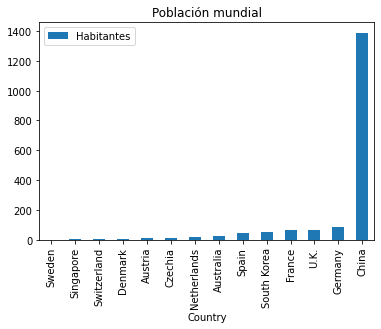

In [ ]:
Best_Country2.plot(kind="bar", title="Población mundial")

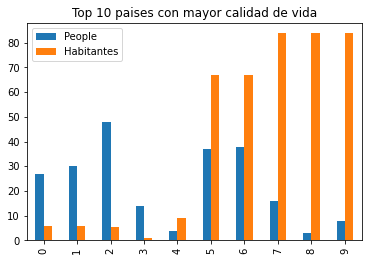

In [ ]:
#Grafica de barras para visualizar la información
df_people.head(10).plot(kind="bar",title = "Top 10 paises con mayor calidad de vida")

Grafica que muestra la comparación entre el top 10 de paises, en relación entre people y habitantes.

##Regresión lineal

In [ ]:
#importamos la librerias a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

1. Ordenamos nuestro DataFrame por "Country" y sacamos un promedio, lo que nos da promedio del ranking total de las tres categorías por país 

In [ ]:
#Agrupamos nuestro dataframe completo por país para condensar toda la información respecto a un mismo país y promediarlo 
df_yabasta= df_complete.groupby(by="Country").mean()
df_yabasta

,People,Planet,Profit,Overall,Habitantes
Country,,,,,
Australia,17.0,25.00,20.00,18.00,25.499881
Austria,4.0,4.00,14.00,4.00,8.978929
China,81.0,29.00,2.00,16.00,1389.000000
Czechia,6.0,31.00,7.00,9.00,10.708982
Denmark,24.0,13.00,17.00,14.00,5.873420
France,20.0,32.00,9.00,15.00,65.273512
Germany,8.0,13.75,22.75,10.25,83.783945
Netherlands,4.5,18.00,31.00,15.00,17.440000
Singapore,48.0,12.00,1.00,2.00,5.454000


2. Convertimos nuestras columnas en listas 

In [ ]:
#Convertimos nuestra columna Overall en una lista para definirlo como la variable X
X = df_yabasta["Overall"].to_numpy().tolist()


In [ ]:
##Convertimos nuestra columna Habitantes en una lista para definirlo como la variable Y (dependiente)
Y = df_yabasta["Habitantes"].to_numpy().tolist()


In [ ]:
x= X
y= Y

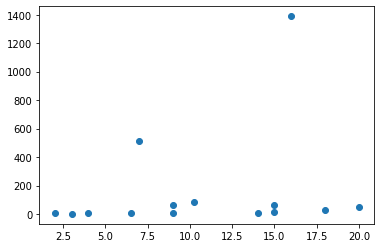

In [ ]:
#Nos muestra la distribución de los datos, siendo cada punto una coordenada entre el promedio de overall y los habitantes 
plt.scatter(x,y)
plt.show()

Distribución de los datos

In [ ]:
#Calculo de la media de la variable, que nos indica el promedio 
barx = np.mean(X)
bary = np.mean(Y)

print(barx,bary)

10.625 160.4333953571429


In [ ]:
#Varianza muestral: nos muestra la variabilidad de un conjunto de datos respecto de la media de la variable
#Covarianza muestral: Refleja en qué cuantía don variables varían de forma conjunta respecto de sus medias
varx = np.var(X,ddof=1)#Varianza muestral
covxy = np.cov(X,Y,ddof=1)#Covarianza muestral

varx,covxy

(33.29567307692308, array([[3.32956731e+01, 4.86580510e+02],
        [4.86580510e+02, 1.42392973e+05]]))

In [ ]:
#Relación entre la varianza y covarianza 
#Si la covarianza es positiva, la correlación será directa. (en este caso)
#Si la covarianza es negativa, la correlación será inversa.
beta1 = covxy/varx
beta0 = bary-beta1*barx

print(beta0,beta1)

[[ 1.49808395e+02  5.16042929e+00]
 [ 5.16042929e+00 -4.52786643e+04]] [[1.00000000e+00 1.46139262e+01]
 [1.46139262e+01 4.27662096e+03]]


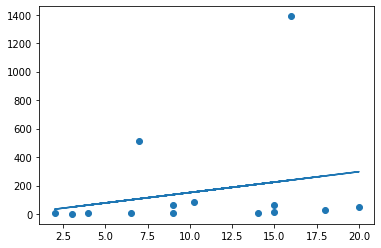

In [ ]:
#Queremos saber que tipo de pendiente tiene nuestra información
#En nuestra gráfica podemos notar que es positiva, ya que los datos tienden a incrementarse o disminuir proporcionalmente 
#Y nuestro coeficiente será positivo
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(X,Y)
def myfunc(X):
  return slope * X + intercept
mymodel = list(map(myfunc,X))
plt.scatter(X,Y)
plt.plot(X,mymodel)
plt.show()

Cuenta con una pendiente positiva

***Al momento de sacar la pendiente, nos dimos cuenta que el número de habitantes sí influye en la calificación del país, ya que entre más alto el número peor calificación obtiene

In [ ]:
slope, intercept

(14.613926217890407, 5.16042929205733)

In [ ]:
r

0.22346861134088808

In [ ]:
#Predicciones de un valor que no esta dado
var_poblacion = myfunc(12.5) 
print(var_población)

187.83450701568742


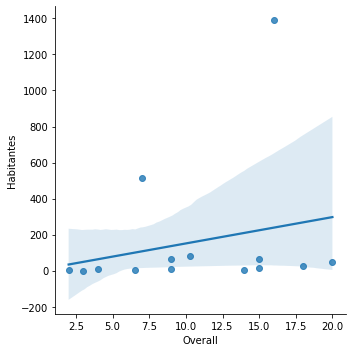

In [ ]:
#Ahora calculamos nuestra regresión lineal
#Con intervalo de confianza (parte sombreada)
#Recta que mejor se ajusta a los datos, teniendo en la parte sombreada el intervalo de confianza en donde se pueden distribuir la mayor 
#Cantidad de los datos 
sns.lmplot(x = 'Overall', y = 'Habitantes', data = df_yabasta)

Podemos ver la limitación de los datos dentro de esta grafiaca.

In [ ]:
#Creamos nuestro modelo OLS, agregamos habitantes como variable dependiente y la suma del promedio de todos los rankings 
#por país ("Overall") más los rankings por país de Profit, Plante y People 
model = smf.ols('Habitantes ~ Overall+Profit+Planet+People', data = df_yabasta )

In [ ]:
results = model.fit()

In [ ]:
#El resumen nos muestra nuestro tipo de modelo, que variables está utilizando, la ecuación de la recta,
#nuestra r2 nos muestra la calidad de nuestro modelo (alta después de agregar variables) y también nos indica que los errores sobre 
#la matriz de covarianza están correctamente especificados. 
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:             Habitantes   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     3.794
Date:                Sun, 27 Nov 2022   Prob (F-statistic):             0.0448
Time:                        22:17:34   Log-Likelihood:                -95.494
No. Observations:                  14   AIC:                             201.0
Df Residuals:                       9   BIC:                             204.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -632.4294    320.991     -1.970      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


Nuestro modelo de .62

##Conclusiones
Ariadna: 
Al realizar este proyecto nos dimos cuenta de que una base de datos simple que no nos brinda una gran cantidad de información puede convertirse en una base de datos que nos arroje un modelo predictivo, nos enseñe relación entre las variables y lo más impoprtante, nos permita conocer y analizar información útil para nosotras y para otras personas interesadas en temas como sostenibilidad, economía de un país o calidad de vida. 
Convertimos un ranking en un modelo que puede tener usos de muchos tipos, como una consulta personal, hasta un senso poblacional o un análisis económico de un país, estadísticas respecto a efectividad de los programas ecológicos entre muchos otros. 

Aura:
Con el desarrollo de este proyecto pude ver la aplicación real de la probabilidad aplicada a datos, de esta ultima etapa pudimos sacar primero un promedio del ranking general de los pais en los 4 indicadores que contaba, donde pudimos ver que el pais con mejor puntaje dentro de la categoria de relación con el planeta, energias renovables es Suecia. Con la palicación de la regresión lineal podemos obser que si tomamos en cuenta todos los factores el modelo cuenta con una efectividad del 62%. Contando con una pendiente positiva, ademas podemos observar que a mayor población es mas dificil mantener un buen lugar dentro del ranking, por lo que es bastante probable encontrarse dentro de los ultimos lugares como es el caso de China que cuenta con la peor puntación en el aspecto calidad de vida de sus habitantes.

